# Imports

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('Real_test.csv')
test_for_prediction=pd.read_csv('Real_test.csv')

# Get Info

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualize

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style

In [9]:
def bar_chart (feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Suvived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    
    

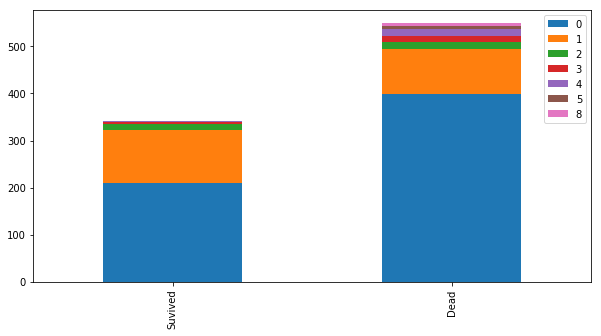

In [10]:
bar_chart('SibSp')

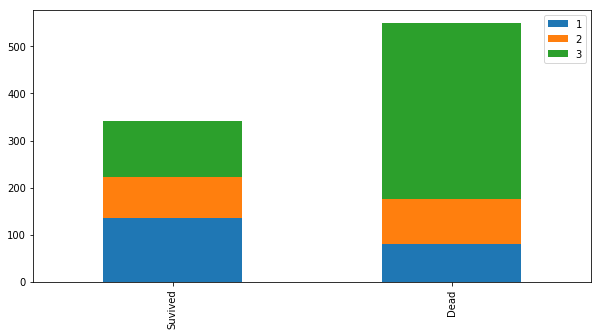

In [11]:
bar_chart('Pclass')

# Feature Engineering

In [12]:
data=[train,test]
for dataset in data:
    dataset['Title']=dataset['Name'].str.extract('([a-zA-Z]+)\.',expand=False)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Capt          1
Jonkheer      1
Ms            1
Sir           1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [15]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [16]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)
train=train.drop(['PassengerId'],axis=1)
test=test.drop(['PassengerId'],axis=1)
test=test.drop(['Cabin'],axis=1)
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Ticket'],axis=1)
train=train.drop(['Ticket'],axis=1)

In [17]:
data=[train,test]
Sex_mapping={'male':0,'female':1}
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(Sex_mapping)

In [18]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())

In [19]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,0
1,3,1,47.0,1,0,7.0000,S,2
2,2,0,62.0,0,0,9.6875,Q,0
3,3,0,27.0,0,0,8.6625,S,0
4,3,1,22.0,1,1,12.2875,S,2


In [20]:
data=[train,test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [21]:
data=[train,test]
for dataset in data:
    dataset['Fare']=dataset['Fare'].astype(int)
    dataset.loc[dataset['Fare']<10, 'Fare']=0
    dataset.loc[(dataset['Fare']>10) & (dataset['Fare']<=20), 'Fare']=1
    dataset.loc[(dataset['Fare']>20) & (dataset['Fare']<=30), 'Fare']=2
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=40), 'Fare']=3
    dataset.loc[(dataset['Fare']>40) & (dataset['Fare']<=50), 'Fare']=4
    dataset.loc[(dataset['Fare']>50) & (dataset['Fare']<=60), 'Fare']=5
    dataset.loc[dataset['Fare']>60, 'Fare']=6

In [22]:
data=[train,test]
common_value='S'
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)


In [23]:
ports={'S':0,'Q':1,'C':2}
data=[train,test]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

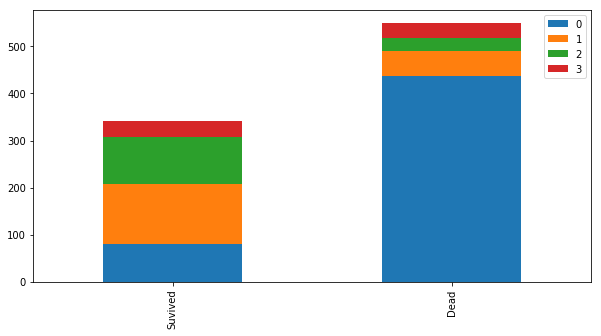

In [24]:
bar_chart('Title')

# Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

In [26]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']


In [27]:
train_data.shape, target.shape

((891, 8), (891,))

# KFold

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNN

In [29]:
clf = KNeighborsClassifier(n_neighbors = 13)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)

[0.85555556 0.80898876 0.79775281 0.75280899 0.82022472 0.80898876
 0.80898876 0.79775281 0.80898876 0.83146067]


In [30]:
round(np.mean(score)*100,4)

80.9151

# Decision_Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf_2 = DecisionTreeClassifier()
scoring = 'accuracy'
score_2 = cross_val_score(clf_2, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_2)

[0.76666667 0.79775281 0.79775281 0.75280899 0.83146067 0.79775281
 0.84269663 0.7752809  0.76404494 0.78651685]


In [33]:
round(np.mean(score_2)*100,2)

79.13

# Random_Forrest

In [34]:
clf_3 = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score_3 = cross_val_score(clf_3, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_3)

[0.8        0.85393258 0.78651685 0.7752809  0.84269663 0.79775281
 0.84269663 0.78651685 0.7752809  0.78651685]


In [35]:
round(np.mean(score_3)*100,1)

80.5

# SVM

In [36]:
clf_4 = SVC()
scoring = 'accuracy'
score_4 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_4)

[0.85555556 0.80898876 0.79775281 0.75280899 0.82022472 0.80898876
 0.80898876 0.79775281 0.80898876 0.83146067]


In [37]:
round(np.mean(score_4)*100,4)

80.9151

In [38]:
clf_5 = LogisticRegression()
scoring = 'accuracy'
score_5 = cross_val_score(clf_5, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_5)

[0.78888889 0.7752809  0.79775281 0.78651685 0.80898876 0.80898876
 0.80898876 0.85393258 0.82022472 0.86516854]


In [39]:
round(np.mean(score_5)*100,3)

81.147

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
clf_6=GaussianNB()
scoring="accuracy"
score_6=cross_val_score(clf_6, train_data,target,cv=k_fold, n_jobs=1,scoring=scoring)

In [42]:
round(np.mean(score_6)*100,2)

79.35

# Testing

In [43]:
from sklearn.svm import SVC

In [44]:
clf = LogisticRegression()
clf.fit(train_data, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
test_data = test
prediction = clf.predict(test_data)

In [46]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Submission

In [47]:
sub_5=pd.DataFrame({"PassengerId": test_for_prediction["PassengerId"],'Survived':prediction })
sub_5.to_csv('sub_5_6.csv', index=False)

In [48]:
test.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,5,0,0,0,1,0
1,3,1,6,1,0,0,0,2
2,2,0,6,0,0,0,1,0
3,3,0,3,0,0,0,0,0
